# Inspect Slycot

This notebook shows how to inspect the slycot module.
The result gives us a first insight which slicot procedures are implemented.
In addition we get some insight about the orginisation of the module.

In [1]:
import re
import slycot
print(slycot.__version__)

0.1.dev606+g8b31df8


## Inspect Wrapper function

In [2]:
def get_slycot_method(sly):
    all_attributes = dir(sly)
    r = re.compile("[a-z][a-z][0-9][0-9a-z][a-z][a-z]")
    matched_attributes = list(filter(r.match, all_attributes)) # Read Note below
    return matched_attributes

In [3]:
def print_list_chunks(l, n=6):
      
    start = 0
    end = len(l)
    step = n
    for i in range(start, end, step):
        x = i
        print(l[x:x+step])


### Outer wrapper

In [4]:
slycot_wrapper = get_slycot_method(slycot)

print(f"Currently there are {len(slycot_wrapper)} methods implemented.")
print("------")
print(print_list_chunks(slycot_wrapper))

Currently there are 49 methods implemented.
------
['ab01nd', 'ab05md', 'ab05nd', 'ab07nd', 'ab08nd', 'ab08nz']
['ab09ad', 'ab09ax', 'ab09bd', 'ab09md', 'ab09nd', 'ab13bd']
['ab13dd', 'ab13ed', 'ab13fd', 'ab13md', 'mb03rd', 'mb03vd']
['mb03vy', 'mb03wd', 'mb05md', 'mb05nd', 'mc01td', 'sb01bd']
['sb02md', 'sb02mt', 'sb02od', 'sb03md', 'sb03md57', 'sb03od']
['sb04md', 'sb04qd', 'sb10ad', 'sb10dd', 'sb10fd', 'sb10hd']
['sg02ad', 'sg03ad', 'sg03bd', 'tb01id', 'tb01pd', 'tb03ad']
['tb04ad', 'tb05ad', 'tc01od', 'tc04ad', 'td04ad', 'tf01md']
['tf01rd']
None


### Inner wrapper

In [5]:
slycot_f2py_wrapper = get_slycot_method(slycot._wrapper)

print(f"Currently there are {len(slycot_f2py_wrapper)} methods implemented.")
print("------")
print(print_list_chunks(slycot_f2py_wrapper))

Currently there are 71 methods implemented.
------
['ab01nd', 'ab05md', 'ab05nd', 'ab07nd', 'ab08nd', 'ab08nz']
['ab09ad', 'ab09ax', 'ab09bd', 'ab09md', 'ab09nd', 'ab13bd']
['ab13dd', 'ab13ed', 'ab13fd', 'ab13md', 'ag08bd', 'mb03rd']
['mb03vd', 'mb03vy', 'mb03wd', 'mb05md', 'mb05nd', 'mc01td']
['sb01bd', 'sb02md', 'sb02mt_c', 'sb02mt_cl', 'sb02mt_n', 'sb02mt_nl']
['sb02od_b', 'sb02od_c', 'sb02od_d', 'sb02od_n', 'sb03md', 'sb03od']
['sb04md', 'sb04qd', 'sb10ad', 'sb10dd', 'sb10fd', 'sb10hd']
['sb10jd', 'sg02ad_bb', 'sg02ad_bc', 'sg02ad_bd', 'sg02ad_bn', 'sg02ad_g']
['sg03ad', 'sg03bd', 'tb01id', 'tb01pd', 'tb03ad_l', 'tb03ad_r']
['tb04ad_c', 'tb04ad_r', 'tb05ad_ag', 'tb05ad_ng', 'tb05ad_nh', 'tc01od_l']
['tc01od_r', 'tc04ad_l', 'tc04ad_r', 'td04ad_c', 'td04ad_r', 'tf01md']
['tf01rd', 'tg01ad', 'tg01fd_ii', 'tg01fd_nn', 'tg01fd_uu']
None


## Generate Sets for the Venn-Diagramm

In [6]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [7]:
in_slycot_wrapper = list(set(slycot_wrapper) - set(slycot_f2py_wrapper))
in_slycot_wrapper

print(f"Currently there are {len(in_slycot_wrapper)} routines implemented in slycot_wrapper which are not in slycot_f2py_wrapper.")
print("------")
print(print_list_chunks(in_slycot_wrapper))
print("\n")

in_slycot_f2py_wrapper = list(set(slycot_f2py_wrapper) - set(slycot_wrapper))
in_slycot_f2py_wrapper

print(f"Currently there are {len(in_slycot_f2py_wrapper)} routines implemented in slycot_f2py_wrapper which are not in slycot_wrapper.")
print("------")
print(print_list_chunks(in_slycot_f2py_wrapper))
print("\n")

diff = list(set(slycot_f2py_wrapper) ^ set(slycot_wrapper))
diff

print(f"Currently there are {len(diff)} routines implemented in slycot_wrapper or slycot_f2py_wrapper.")
print("------")
print(print_list_chunks(diff))
print("\n")

Currently there are 10 routines implemented in slycot_wrapper which are not in slycot_f2py_wrapper.
------
['tb05ad', 'sb02od', 'td04ad', 'tc04ad', 'tc01od', 'sb02mt']
['sb03md57', 'tb04ad', 'sg02ad', 'tb03ad']
None


Currently there are 32 routines implemented in slycot_f2py_wrapper which are not in slycot_wrapper.
------
['sg02ad_bd', 'tc01od_r', 'sg02ad_bc', 'sb02od_n', 'sg02ad_g', 'tg01ad']
['tb05ad_nh', 'sb10jd', 'td04ad_r', 'sb02mt_nl', 'tb05ad_ng', 'tb04ad_r']
['tb03ad_r', 'td04ad_c', 'tg01fd_uu', 'ag08bd', 'tb03ad_l', 'sb02od_b']
['sb02mt_n', 'tg01fd_nn', 'sb02mt_c', 'tb05ad_ag', 'tc04ad_r', 'sb02od_d']
['tg01fd_ii', 'sg02ad_bb', 'tc04ad_l', 'sb02mt_cl', 'tb04ad_c', 'tc01od_l']
['sb02od_c', 'sg02ad_bn']
None


Currently there are 42 routines implemented in slycot_wrapper or slycot_f2py_wrapper.
------
['sg02ad_bd', 'tc04ad', 'tc01od_r', 'sb02mt', 'sb02od_n', 'sg02ad_bc']
['sg02ad_g', 'tg01ad', 'tb05ad_nh', 'sb10jd', 'td04ad_r', 'sb02mt_nl']
['tb05ad_ng', 'td04ad', 'tb04ad_r', '

In [8]:
intersection = list(set(slycot_f2py_wrapper) & set(slycot_wrapper))
intersection

print(f"Currently there are {len(intersection)} routines implemented in slycot_wrapper and in slycot_f2py_wrapper.")
print("------")
print(print_list_chunks(intersection))
print("\n")

union = list(set(slycot_f2py_wrapper) | set(slycot_wrapper))

print(f"Currently there are {len(union)} routines implemented in slycot_wrapper or in slycot_f2py_wrapper.")
print("------")
print(print_list_chunks(union))
print("\n")

Currently there are 39 routines implemented in slycot_wrapper and in slycot_f2py_wrapper.
------
['tf01md', 'ab13ed', 'mb05md', 'ab13fd', 'mb03vd', 'ab07nd']
['mb03rd', 'ab09bd', 'ab05md', 'sg03bd', 'ab08nz', 'sb10hd']
['mb05nd', 'ab09md', 'mc01td', 'tb01id', 'ab08nd', 'ab13dd']
['sb02md', 'ab09ax', 'sb10ad', 'sb10dd', 'ab09ad', 'ab13md']
['sb01bd', 'tf01rd', 'ab13bd', 'sg03ad', 'sb03md', 'tb01pd']
['ab01nd', 'ab05nd', 'sb03od', 'sb04qd', 'ab09nd', 'mb03vy']
['sb10fd', 'mb03wd', 'sb04md']
None


Currently there are 81 routines implemented in slycot_wrapper or in slycot_f2py_wrapper.
------
['sg02ad_bd', 'ab13ed', 'tc04ad', 'ab13fd', 'mb03vd', 'tc01od_r']
['sb02mt', 'mb03rd', 'sb02od_n', 'sg02ad_g', 'tg01ad', 'tb05ad_nh']
['ab08nz', 'sb10hd', 'td04ad', 'tb04ad_r', 'tb03ad_r', 'tb04ad']
['ab09md', 'ab08nd', 'ab13dd', 'mc01td', 'sb02od_b', 'tb01id']
['tb03ad_l', 'sb02md', 'sb10dd', 'ab09ad', 'sb02mt_c', 'tb05ad_ag']
['tb01pd', 'sg02ad_bb', 'ab05nd', 'tb05ad', 'sb03od', 'sb04qd']
['sb02od_

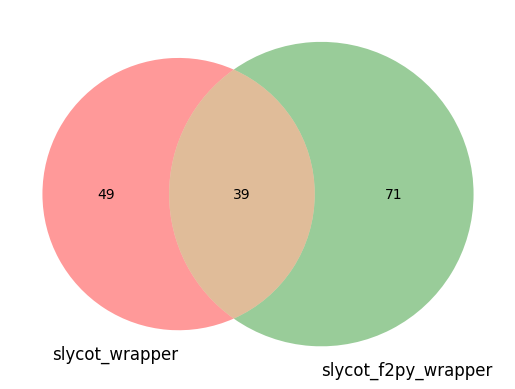

In [9]:
venn2(subsets = (len(set(slycot_wrapper)), 
                 len(set(slycot_f2py_wrapper)), 
                 len(intersection)), set_labels = ('slycot_wrapper', 'slycot_f2py_wrapper'))
plt.show()